### Teste de hípotese / IC

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# Clean data path
clean_data_path = "../data/games_clean.csv"

In [3]:
# Default figure size
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
# Dataframe with Pandas
chess_df = pd.read_csv(clean_data_path)
chess_df

,rated,turns,victory_status,winner,time,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
1,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
2,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
3,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5
4,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...
16150,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,2
16151,True,82,mate,black,10+0,1233,1196,A41,Queen's Pawn,2
16152,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
16153,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,4


#### Teste 1

Hipotese nula: A taxa de vitória de cada abertura enquanto negras não está relacionada ao rank dos jogadores.

Hipotese alternativa: A taxa de vitória de cada abertura enquanto negras está relacionada ao rank dos jogadores.

In [5]:
# Players rating between 750 - 2500
# divide into groups by rating

# 750 - 1000
group_one = chess_df[(chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 1000]

# 1000 - 1250
group_two = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 1250)]
group_two = group_two[((group_two["white_rating"] + group_two["black_rating"]) / 2 > 1000)]

# 1250 - 1500
group_three = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 1500)]
group_three = group_three[((group_three["white_rating"] + group_three["black_rating"]) / 2 > 1250)]

# 1500 - 1750
group_four = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 1750)]
group_four = group_four[((group_four["white_rating"] + group_four["black_rating"]) / 2 > 1500)]

# 1750 - 2000
group_five = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 2000)]
group_five = group_five[((group_five["white_rating"] + group_five["black_rating"]) / 2 > 1750)]

# 2000 - 2250
group_six = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 <= 2250)]
group_six = group_six[((group_six["white_rating"] + group_six["black_rating"]) / 2 > 2000)]

# 2250 - 2500
group_seven = chess_df[((chess_df["white_rating"] + chess_df["black_rating"]) / 2 > 2250)]

In [6]:
# openings with higher win rate by group one

chess_winner_opening_df_group_one = group_one.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_one = chess_winner_opening_df_group_one[chess_winner_opening_df_group_one['winner'] == 'black']
chess_black_openings_group_one = chess_black_openings_group_one.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_one

In [7]:
# openings with higher win rate by group two

chess_winner_opening_df_group_two = group_two.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_two = chess_winner_opening_df_group_two[chess_winner_opening_df_group_two['winner'] == 'black']
chess_black_openings_group_two = chess_black_openings_group_two.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_two

In [8]:
# openings with higher win rate by group three

chess_winner_opening_df_group_three = group_three.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_three = chess_winner_opening_df_group_three[chess_winner_opening_df_group_three['winner'] == 'black']
chess_black_openings_group_three = chess_black_openings_group_three.sort_values("count", ascending=False).head(5)

chess_black_openings_group_three

,winner,opening_name,count
479,black,Van't Kruijs Opening,96
407,black,Sicilian Defense,52
384,black,Scandinavian Defense,47
230,black,King's Pawn Game: Wayward Queen Attack,43
411,black,Sicilian Defense: Bowdler Attack,38


In [9]:
# openings with higher win rate by group four

chess_winner_opening_df_group_four = group_four.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_four = chess_winner_opening_df_group_four[chess_winner_opening_df_group_four['winner'] == 'black']
chess_black_openings_group_four = chess_black_openings_group_four.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_four

In [10]:
# openings with higher win rate by group five

chess_winner_opening_df_group_five = group_five.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_five = chess_winner_opening_df_group_five[chess_winner_opening_df_group_five['winner'] == 'black']
chess_black_openings_group_five = chess_black_openings_group_five.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_five

In [11]:
# openings with higher win rate by group six

chess_winner_opening_df_group_six = group_six.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_six = chess_winner_opening_df_group_six[chess_winner_opening_df_group_six['winner'] == 'black']
chess_black_openings_group_six = chess_black_openings_group_six.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_six

In [12]:
# openings with higher win rate by group seven

chess_winner_opening_df_group_seven = group_seven.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_black_openings_group_seven = chess_winner_opening_df_group_seven[chess_winner_opening_df_group_seven['winner'] == 'black']
chess_black_openings_group_seven = chess_black_openings_group_seven.sort_values("count", ascending=False).head(5)

# chess_black_openings_group_seven

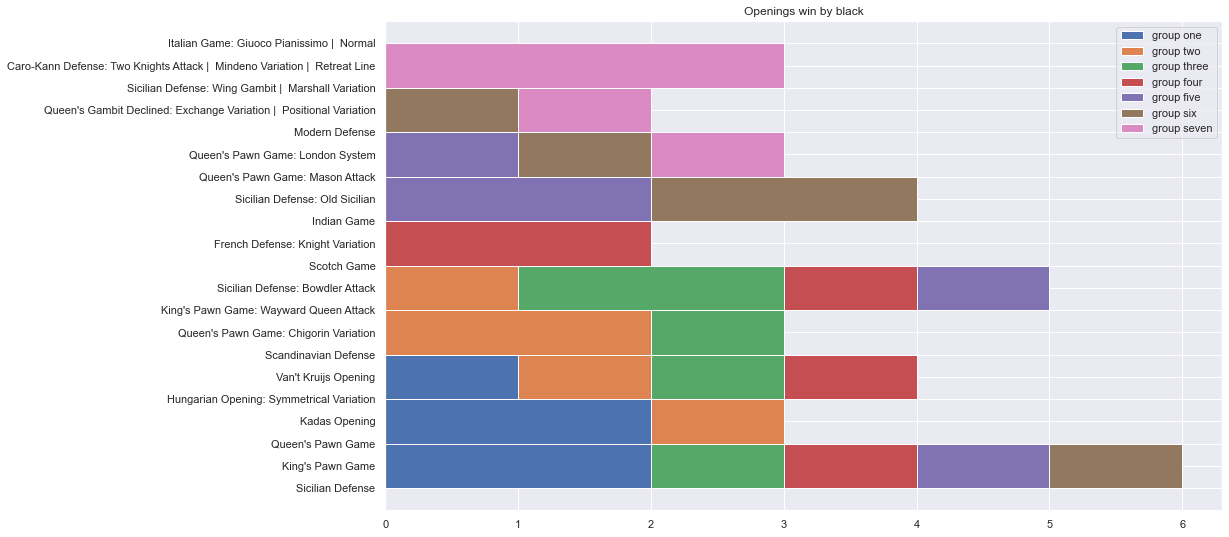

In [13]:
# openings win by black

plt.title("Openings win by black")
plt.hist([chess_black_openings_group_one.opening_name, chess_black_openings_group_two.opening_name, chess_black_openings_group_three.opening_name, chess_black_openings_group_four.opening_name, chess_black_openings_group_five.opening_name, chess_black_openings_group_six.opening_name, chess_black_openings_group_seven.opening_name], stacked=True, orientation="horizontal")
plt.legend(["group one", "group two", "group three", "group four", "group five", "group six", "group seven"])

Dentre os jogos observados, pode-se perceber que a taxa de vitória de cada abertura enquanto negras está relacionada aos níveis dos jogadores.

#### Teste 2

Hipotese nula: A taxa de vitória de cada abertura enquanto brancas não está relacionada ao rank dos jogadores.

Hipotese alternativa: A taxa de vitória de cada abertura enquanto brancas está relacionada ao rank dos jogadores.

In [14]:
# openings with higher win rate by group one

chess_winner_opening_df_group_one = group_one.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_one = chess_winner_opening_df_group_one[chess_winner_opening_df_group_one['winner'] == 'white']
chess_white_openings_group_one = chess_white_openings_group_one.sort_values("count", ascending=False).head(5)

# chess_white_openings_group_one

In [15]:
# openings with higher win rate by group two

chess_winner_opening_df_group_two = group_two.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_two = chess_winner_opening_df_group_two[chess_winner_opening_df_group_two['winner'] == 'white']
chess_white_openings_group_two = chess_white_openings_group_two.sort_values("count", ascending=False).head(5)

# chess_white_openings_group_two

In [16]:
# openings with higher win rate by group three

chess_winner_opening_df_group_three = group_three.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_three = chess_winner_opening_df_group_three[chess_winner_opening_df_group_three['winner'] == 'white']
chess_white_openings_group_three = chess_white_openings_group_three.sort_values("count", ascending=False).head(5)

chess_white_openings_group_three

,winner,opening_name,count
1032,white,Scandinavian Defense: Mieses-Kotroc Variation,57
1114,white,Van't Kruijs Opening,49
718,white,Four Knights Game: Italian Variation,41
1034,white,Scotch Game,41
848,white,King's Pawn Game: Wayward Queen Attack,40


In [17]:
# openings with higher win rate by group four

chess_winner_opening_df_group_four = group_four.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_four = chess_winner_opening_df_group_four[chess_winner_opening_df_group_four['winner'] == 'white']
chess_white_openings_group_four = chess_white_openings_group_four.sort_values("count", ascending=False).head(5)

# chess_white_openings_group_four

In [18]:
# openings with higher win rate by group five

chess_winner_opening_df_group_five = group_five.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_five = chess_winner_opening_df_group_five[chess_winner_opening_df_group_five['winner'] == 'white']
chess_white_openings_group_five = chess_white_openings_group_five.sort_values("count", ascending=False).head(5)

# chess_white_openings_group_five

In [19]:
# openings with higher win rate by group six

chess_winner_opening_df_group_six = group_six.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_six = chess_winner_opening_df_group_six[chess_winner_opening_df_group_six['winner'] == 'white']
chess_white_openings_group_six = chess_white_openings_group_six.sort_values("count", ascending=False).head(5)

# chess_white_openings_group_six

In [20]:
# openings with higher win rate by group seven

chess_winner_opening_df_group_seven = group_seven.groupby(['winner','opening_name']).size().reset_index(name="count")
chess_white_openings_group_seven = chess_winner_opening_df_group_seven[chess_winner_opening_df_group_seven['winner'] == 'white']
chess_white_openings_group_seven = chess_white_openings_group_seven.sort_values("count", ascending=False).head(5)

chess_white_openings_group_seven.iloc[0]['opening_name']

'Nimzo-Indian Defense: Normal Variation |  Ragozin Variation'

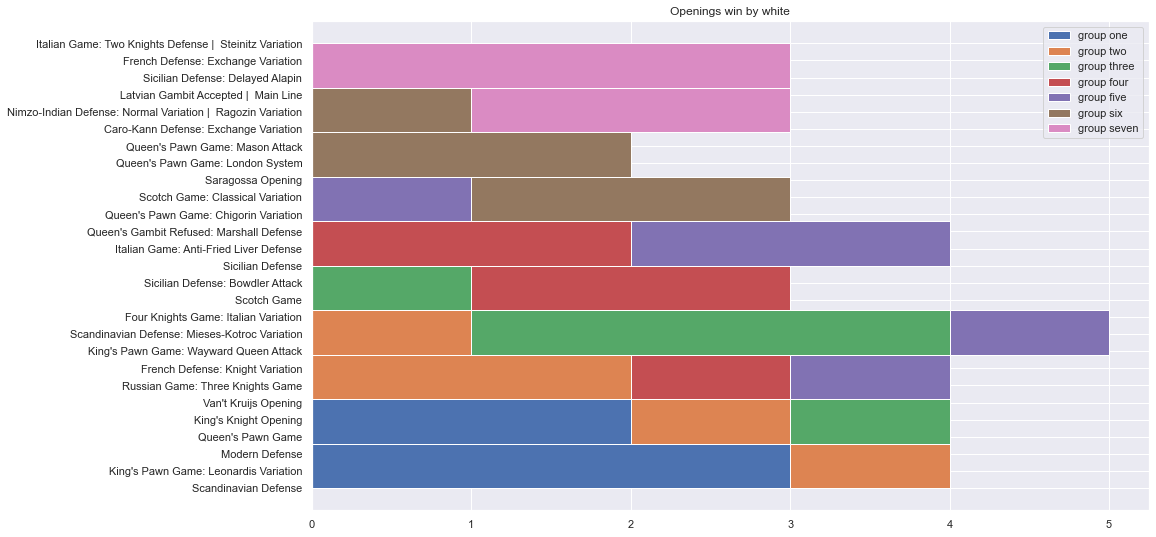

In [21]:
# openings win by white

plt.title("Openings win by white")
plt.hist([chess_white_openings_group_one.opening_name, chess_white_openings_group_two.opening_name, chess_white_openings_group_three.opening_name, chess_white_openings_group_four.opening_name, chess_white_openings_group_five.opening_name, chess_white_openings_group_six.opening_name, chess_white_openings_group_seven.opening_name], stacked=True, orientation="horizontal")
plt.legend(["group one", "group two", "group three", "group four", "group five", "group six", "group seven"])

Dentre os jogos observados, pode-se perceber que a taxa de vitória de cada abertura enquanto brancas está relacionada aos níveis dos jogadores.

#### IC 1

Para a abertura Scandinavian Defense: Mieses-Kotroc Variation, a qual se mostrou a abertura com mais vitórias para o grupo 3 (1250 - 1500 rating) onde brancas ganham, achar o intervalo de confiança de quando brancas vencem para o nível dos jogadores que a jogaram

In [22]:
def ic(df, column):
    data = df[column]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

openning_name1 = "Scandinavian Defense: Mieses-Kotroc Variation"

In [23]:
white_win_df = chess_df[chess_df['winner'] == 'white']
# white_win_df

(array([ 1.,  2., 15., 27., 21., 23., 17., 13.,  4.,  6.]),
 array([ 912., 1043., 1174., 1305., 1436., 1567., 1698., 1829., 1960.,
        2091., 2222.]),
 <BarContainer object of 10 artists>)

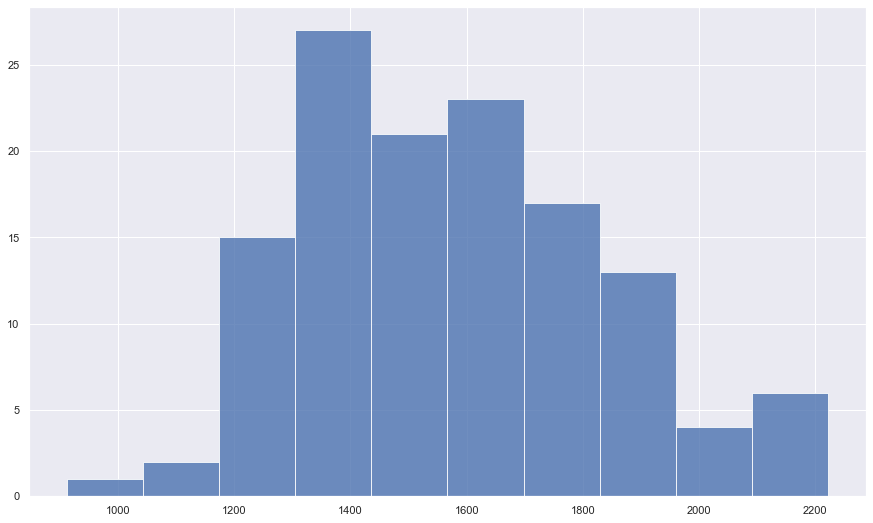

In [24]:
_df1 = white_win_df[white_win_df['opening_name'] == openning_name1]

plt.hist(_df1['white_rating'], alpha=0.8)

In [25]:
ic(_df1, "white_rating")

(1530.1535406269963, 1617.9859942567246)

#### IC 2

Para a abertura Van't Kruijs Opening, a qual se mostrou a abertura com mais vitórias para o grupo 3 (1250 - 1500 rating) onde negras ganham, achar o intervalo de confiança de quando negras vencem para o nível dos jogadores que a jogaram

In [26]:
def ic(df, column):
    data = df[column]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

openning_name2 = "Van't Kruijs Opening"

In [27]:
black_win_df = chess_df[chess_df['winner'] == 'black']
# black_win_df

(array([ 1., 19., 45., 40., 35., 31., 14.,  6.,  2.,  5.]),
 array([ 963. , 1092.4, 1221.8, 1351.2, 1480.6, 1610. , 1739.4, 1868.8,
        1998.2, 2127.6, 2257. ]),
 <BarContainer object of 10 artists>)

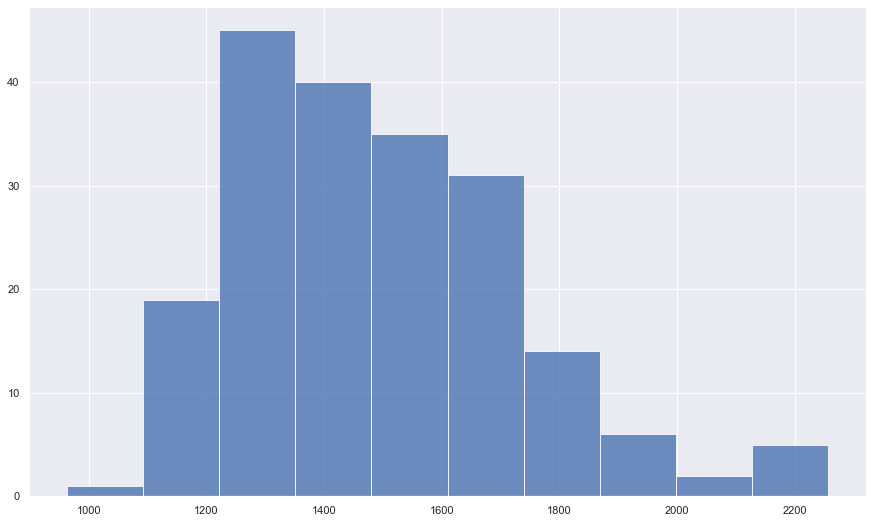

In [28]:
_df2 = black_win_df[black_win_df['opening_name'] == openning_name2]

plt.hist(_df2['black_rating'], alpha=0.8)

In [29]:
ic(_df2, "black_rating")

(1457.4323226295653, 1524.2848490876065)